In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
citydata_df = pd.read_csv(city_data_to_load)
citydata_df.head()

ridedata_df = pd.read_csv(ride_data_to_load)
ridedata_df.head()
# Combine the data into a single dataset
mergedata_df = pd.merge(ridedata_df, citydata_df)
# Display the data table for preview
mergedata_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

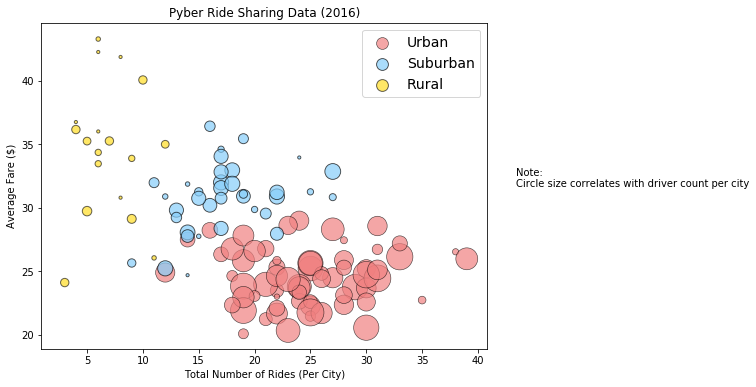

In [2]:
# Obtain the x and y coordinates for each of the three city types
groupdata = mergedata_df
avgfare = groupdata["fare"].mean()
totalrides = groupdata["ride_id"].count()
drivercount = groupdata["driver_count"].sum()
totaldriver = (drivercount // totalrides)

typedata = citydata_df.groupby("type")

scatterdata = pd.DataFrame({"AverageFare": [avgfare],
                        "TotalRides": [totalrides],
                        "TotalDrivers": [totaldriver]})

scatterdata["AverageFare"] = scatterdata["AverageFare"].round(2)
# Build the scatter plots for each city types
urbandata = mergedata_df.loc[mergedata_df["type"] == "Urban", :]
suburbandata = mergedata_df.loc[mergedata_df["type"] == "Suburban", :]
ruraldata = mergedata_df.loc[mergedata_df["type"] == "Rural"]
groupurban = urbandata.groupby("city")
groupsub = suburbandata.groupby("city")
grouprural = ruraldata.groupby("city")
# Urban Data Analysis
urbanfare = groupurban["fare"].mean()
urbanrides = groupurban["ride_id"].count()
urbancount = groupurban["driver_count"].sum()
urbandrivers = (urbancount // urbanrides)

# Suburban Data Analysis
subfare = groupsub["fare"].mean()
subrides = groupsub["ride_id"].count()
subcount = groupsub["driver_count"].sum()
subdrivers = (subcount // subrides)

# Rural Data Analysis
ruralfare = grouprural["fare"].mean()
ruralrides = grouprural["ride_id"].count()
ruralcount = grouprural["driver_count"].sum()
ruraldrivers = (ruralcount // ruralrides)


# Plot_df
urbdat = pd.DataFrame({"AverageFare": urbanfare,
                       "TotalRides": urbanrides,
                       "TotalDrivers": urbandrivers})
urbdat["AverageFare"] = urbdat["AverageFare"].round(2)

subdat = pd.DataFrame({"AverageFare": subfare,
                     "TotalRides": subrides,
                     "TotalDrivers": subdrivers})
subdat["AverageFare"] = subdat["AverageFare"].round(2)

rurdat = pd.DataFrame({"AverageFare": ruralfare,
                       "TotalRides": ruralrides,
                       "TotalDrivers": ruraldrivers})
rurdat["AverageFare"] = rurdat["AverageFare"].round(2)

# Incorporate the other graph properties
ChangeBubbleSize = 10
CBS = ChangeBubbleSize
plt.figure(figsize=(8,6))
# Urban Scatter Plot Properties
bubbleurb = plt.scatter(urbdat.TotalRides, urbdat.AverageFare, c="LightCoral", label = "Urban", 
                    s=(urbdat.TotalDrivers * CBS), alpha = 0.7, edgecolor = "black", linewidths = .6)

# Suburban Scatter Plot Properties
bubblesub = plt.scatter(subdat.TotalRides, subdat.AverageFare, c="LightSkyBlue", label = "Suburban", 
                    s=(subdat.TotalDrivers * CBS), alpha = 0.7, edgecolor = "black", linewidths = .9)

# Rural Scatter Plot Properties
bubblerur = plt.scatter(rurdat.TotalRides, rurdat.AverageFare, c="gold", label = "Rural", 
                    s=(rurdat.TotalDrivers * CBS), alpha = 0.6, edgecolor = "black", linewidths = 1)

lgnd = plt.legend(handles=[bubbleurb, bubblesub, bubblerur], scatterpoints=1, fontsize=14)
lgnd.legendHandles[0]._sizes = [140]
lgnd.legendHandles[1]._sizes = [140]
lgnd.legendHandles[2]._sizes = [140]

# Create a legend
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Incorporate a text label regarding circle size
plt.figtext(.95, .5, "Note: \nCircle size correlates with driver count per city", fontsize=10)

# Save Figure
plt.savefig("Bubbleplot.png", bbox_inches = 'tight')

In [3]:
# Show plot

plt.show()

## Total Fares by City Type

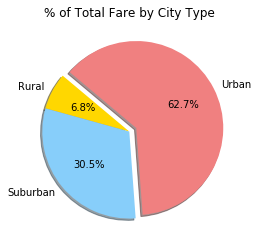

In [4]:
# Calculate Type Percents
gptype = mergedata_df.groupby("type")
orgptype = citydata_df.groupby("type")
# Calculate Type Percents
faretotal = mergedata_df["fare"].sum()
gpfare = gptype["fare"].sum()

gftotal = gpfare / faretotal

# Build Pie Chart
explode = (0, 0, 0.09)
labels = gftotal.index.tolist()
colors = ["gold", "LightSkyBlue", "LightCoral"]
plt.figure(figsize=(6,4))
plt.rcParams['font.size'] = 10.0
plt.pie(gftotal, labels = labels, explode = explode, colors = colors, startangle = 140, shadow = True, autopct="%1.1f%%")
plt.title("% of Total Fare by City Type")
# Save Figure
plt.savefig("Total_Fares.png", bbox_inches = 'tight')

In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

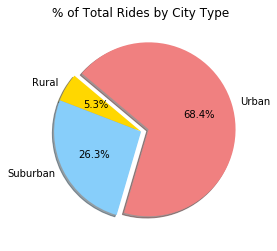

In [6]:
# Calculate Ride Percents
ridetotal = mergedata_df["ride_id"].count()
gpride = gptype["ride_id"].count()
grtotal = gpride / ridetotal
grtotal = grtotal*100
# Build Pie Chart
explode = (0, 0, 0.09)
labels = grtotal.index.tolist()
colors = ["gold", "LightSkyBlue", "LightCoral"]
plt.figure(figsize=(6,4))
plt.rcParams['font.size'] = 10.0
plt.pie(grtotal, labels = labels, explode = explode, colors = colors, startangle = 140, shadow = True, autopct="%1.1f%%")
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Total_Rides.png", bbox_inches = 'tight')

In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

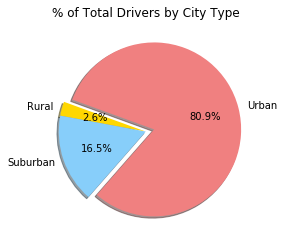

In [8]:
# Calculate Driver Percents
drivertotal = citydata_df["driver_count"].sum()
gpdriver = orgptype["driver_count"].sum()

gdtotal = gpdriver / drivertotal
# Build Pie Charts
explode = (0, 0, 0.10)
labels = gdtotal.index.tolist()
colors = ["gold", "LightSkyBlue", "LightCoral"] 
plt.figure(figsize=(6,4))
plt.rcParams['font.size'] = 10.0
plt.pie(gdtotal, labels = labels, explode = explode, colors = colors, startangle = 160, shadow = True, autopct="%1.1f%%")
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Total_Drivers.png", bbox_inches = 'tight')

In [9]:
# Show Figure
plt.show()